In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# information of 17 places and radious chosen
type_param  = [['atm', 300], ['bar', 2000], ['gas_station', 1000], ['convenience_store', 200],
              ['department_store', 800], ['hospital', 1000], ['university', 2000], ['supermarket', 800], ['gym', 1000],
              ['shopping_mall', 800], ['laundry', 300], ['movie_theater', 800], ['park', 500], ['night_club', 2000], 
              ['primary_school', 2000], ['school',2000], ['tourist_attraction', 2000]]

In [40]:
# column that has less than 20 information (from previous file)
drop_ch = ['atm_price_level', 'gas_station_price_level',
       'convenience_store_price_level', 'department_store_price_level',
       'hospital_price_level', 'university_price_level',
       'supermarket_price_level', 'gym_price_level',
       'shopping_mall_price_level', 'laundry_price_level',
       'laundry_avg_rating', 'movie_theater_price_level',
       'park_price_level', 'primary_school_price_level',
       'school_price_level', 'tourist_attraction_price_level']

In [41]:
ch = pd.read_csv('/content/ch_nofill-2.csv')

In [42]:
ch.head()

,Unnamed: 0,condo,lat,lng,apx_gov_prc,rating,atm_price_level,atm_avg_rating,atm_avg_distance_to_condo (KM),atm_num_of_rating,...,flr_2,flr_3,flr_4,flr_5,flr_6,flr_7,flr_8,flr_9,distance_from_condo_to_central,distance_from_condo_to_clock
0,0,กัลปพฤกษ์ แกรนด์ พาร์ค เชียงราย,19.876132,99.831627,"52,800",4.4,NaN,5.0,0.238583,5.0,...,1,0,0,0,0,0,0,0,1.217282,3.448840
1,1,กัลปพฤกษ์ แกรนด์ พาร์ค เชียงราย,19.876132,99.831627,"54,400",4.4,NaN,5.0,0.238583,5.0,...,0,1,0,0,0,0,0,0,1.217282,3.448840
2,2,กัลปพฤกษ์ แกรนด์ พาร์ค เชียงราย,19.876132,99.831627,"55,500",4.4,NaN,5.0,0.238583,5.0,...,0,0,1,0,0,0,0,0,1.217282,3.448840
3,3,กัลปพฤกษ์ แกรนด์ พาร์ค เชียงราย,19.876132,99.831627,"56,600",4.4,NaN,5.0,0.238583,5.0,...,0,0,0,1,0,0,0,0,1.217282,3.448840
4,4,คิวเฮ้าส์ คอนโด พหลโยธิน-เชียงราย,19.936184,99.844870,"48,500",4.4,NaN,NaN,0.800000,0.0,...,1,0,0,0,0,0,0,0,5.605358,3.541205


In [43]:
ch.drop(columns=["Unnamed: 0", "condo", "lat", "lng"], inplace=True)

In [44]:
#clean "apx_gov_prc" by removing comma 
for i in range(len(ch["apx_gov_prc"])):
  ch["apx_gov_prc"][i] = ch["apx_gov_prc"][i].replace(",", '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# cast "apx_gov_prc" from string to int
ch["apx_gov_prc"] = pd.to_numeric(ch["apx_gov_prc"],errors='coerce',downcast='integer')

#Seperate data set into train and test

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    ch.drop(columns="apx_gov_prc"),
    ch["apx_gov_prc"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((83, 104), (36, 104))

#Fill na to be avg in X_train, X_test to be the avg value of X_train

In [47]:
for i in range(len(type_param)):
  X_train[str(type_param[i][0])+'_avg_rating'].fillna(value = X_train[type_param[i][0]+'_avg_rating'].mean() , inplace=True)
  X_train[str(type_param[i][0])+'_price_level'].fillna(value = X_train[type_param[i][0]+'_price_level'].mean() , inplace=True)
  X_train['rating'].fillna(value = X_train['rating'].mean() , inplace=True)

In [48]:
for i in range(len(type_param)):
  X_test[str(type_param[i][0])+'_avg_rating'].fillna(value = X_train[type_param[i][0]+'_avg_rating'].mean() , inplace=True)
  X_test[str(type_param[i][0])+'_price_level'].fillna(value = X_train[type_param[i][0]+'_price_level'].mean() , inplace=True)
  X_test['rating'].fillna(value = X_train['rating'].mean() , inplace=True)

In [49]:
# drop column that has less than 20 information (from previous file)
X_test.drop(columns=drop_ch, inplace=True)
X_train.drop(columns=drop_ch, inplace=True)

#mutual information In Regression 

In [50]:
X_train.reset_index(inplace=True)
X_train.drop(columns="index", inplace=True)
y_train = y_train.reset_index()
y_train = y_train.drop(columns="index")

In [51]:
X_test.reset_index(inplace=True)
X_test.drop(columns="index", inplace=True)
y_test = y_test.reset_index()
y_test = y_test.drop(columns="index")

In [52]:
X_train.head()

,rating,atm_avg_rating,atm_avg_distance_to_condo (KM),atm_num_of_rating,atm_count,bar_price_level,bar_avg_rating,bar_avg_distance_to_condo (KM),bar_num_of_rating,bar_count,...,flr_2,flr_3,flr_4,flr_5,flr_6,flr_7,flr_8,flr_9,distance_from_condo_to_central,distance_from_condo_to_clock
0,4.4,4.058095,0.800000,0.0,0.0,3.000000,4.687500,1.080862,4403.0,9.0,...,0,0,1,0,0,0,0,0,5.605358,3.541205
1,4.3,4.058095,0.800000,0.0,0.0,2.170732,4.523765,2.500000,0.0,0.0,...,0,0,0,0,0,0,0,0,29.710920,28.809096
2,4.6,3.900000,0.220301,16.0,8.0,2.000000,4.541667,0.299408,644.0,20.0,...,1,0,0,0,0,0,0,0,0.331160,2.383072
3,5.0,4.058095,0.800000,0.0,0.0,2.170732,4.633333,1.034299,35.0,16.0,...,0,0,0,1,0,0,0,0,11.226386,9.184641
4,4.6,3.900000,0.220301,16.0,8.0,2.000000,4.541667,0.299408,644.0,20.0,...,0,0,0,0,1,0,0,0,0.331160,2.383072


In [53]:
X_train[X_train['rating'].isnull()]

,rating,atm_avg_rating,atm_avg_distance_to_condo (KM),atm_num_of_rating,atm_count,bar_price_level,bar_avg_rating,bar_avg_distance_to_condo (KM),bar_num_of_rating,bar_count,...,flr_2,flr_3,flr_4,flr_5,flr_6,flr_7,flr_8,flr_9,distance_from_condo_to_central,distance_from_condo_to_clock


In [54]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.57426208e+00, 9.77345109e-01, 8.51253041e-01, 1.01260378e+00,
       8.89033342e-01, 9.86170311e-01, 1.44274726e+00, 1.67937053e+00,
       1.23431723e+00, 1.15932548e+00, 1.22818971e+00, 1.23732252e+00,
       9.43368052e-01, 1.01331259e+00, 5.94175053e-01, 5.29540911e-01,
       5.21375445e-01, 4.38925347e-01, 8.59678984e-01, 9.81031832e-01,
       6.39083968e-01, 6.96852454e-01, 1.28057110e+00, 1.30203295e+00,
       1.06875165e+00, 1.04327102e+00, 1.08483691e+00, 1.28551843e+00,
       8.25856846e-01, 1.34499951e+00, 1.09783602e+00, 1.38856341e+00,
       6.69157837e-01, 1.36384104e+00, 1.32936843e+00, 1.68067626e+00,
       1.37218734e+00, 1.62114373e+00, 1.43835601e+00, 1.33500953e+00,
       6.78771172e-01, 1.24936819e+00, 4.16241775e-01, 2.59662372e-01,
       3.81728877e-01, 0.00000000e+00, 5.84852544e-01, 4.09627715e-01,
       4.18848109e-01, 3.95187566e-01, 4.94024123e-01, 2.14855813e-01,
       4.92583531e-01, 0.00000000e+00, 1.30221770e+00, 1.40196424e+00,
      

In [55]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

school_avg_rating                 1.826374
gym_avg_distance_to_condo (KM)    1.680676
bar_avg_distance_to_condo (KM)    1.679371
gym_count                         1.621144
distance_from_condo_to_central    1.608250
                                    ...   
flr_4                             0.000000
flr_6                             0.000000
flr_8                             0.000000
flr_9                             0.000000
night_club_price_level            0.000000
Length: 88, dtype: float64

In [56]:
# insights : the features that has 0 mutual info
print(mutual_info[mutual_info<0.0001].index)

Index(['movie_theater_avg_rating', 'night_club_price_level', 'flr_10',
       'flr_12', 'flr_3', 'flr_4', 'flr_6', 'flr_8', 'flr_9'],
      dtype='object')


In [57]:
# choose only the one that has positive value = is related to y
mutual_info = mutual_info[mutual_info>0]

In [58]:
len(mutual_info)

79

In [59]:
X_train = X_train[mutual_info.index]
X_test = X_test[mutual_info.index]

#correlation between feature
##to get highly correlated feature



In [60]:
cor = X_train.corr()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3624 missing from current font.
  font.set_text(s

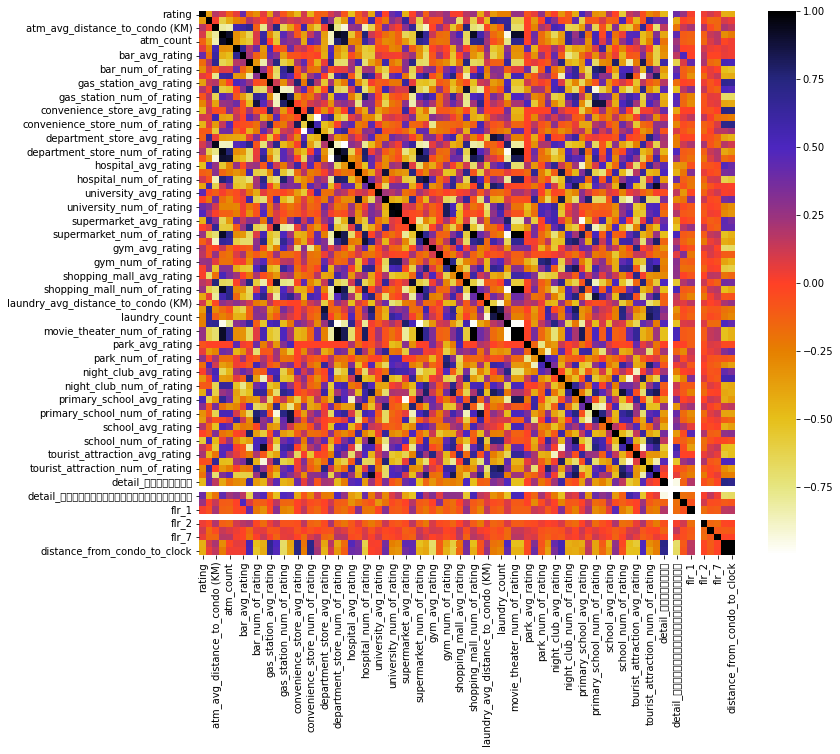

In [61]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

In [62]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    tuple_corr = [] # Set of all tuple of the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                rowname = corr_matrix.columns[i]  # getting the name of column
                colname = corr_matrix.columns[j]
                tuple_corr.append([corr_matrix.iloc[i, j], rowname, colname])
                if mutual_info[rowname]>mutual_info[colname]:
                  col_corr.add(colname)
                else:
                  col_corr.add(rowname)
    return col_corr, tuple_corr

In [63]:
# select the features that are highly correlated
corr_features, tuple_corr = correlation(X_train, 0.75)
len(set(corr_features)) 
# corr_features

46

In [ ]:
corr_features

{'atm_avg_distance_to_condo (KM)',
 'atm_count',
 'atm_num_of_rating',
 'bar_count',
 'convenience_store_avg_rating',
 'convenience_store_count',
 'convenience_store_num_of_rating',
 'department_store_avg_distance_to_condo (KM)',
 'department_store_count',
 'department_store_num_of_rating',
 'detail_พักอาศัย',
 'distance_from_condo_to_clock',
 'gas_station_avg_distance_to_condo (KM)',
 'gas_station_count',
 'gas_station_num_of_rating',
 'gym_num_of_rating',
 'hospital_avg_distance_to_condo (KM)',
 'hospital_count',
 'hospital_num_of_rating',
 'laundry_avg_distance_to_condo (KM)',
 'laundry_count',
 'laundry_num_of_rating',
 'movie_theater_avg_distance_to_condo (KM)',
 'movie_theater_avg_rating',
 'movie_theater_count',
 'movie_theater_num_of_rating',
 'night_club_avg_rating',
 'night_club_count',
 'night_club_num_of_rating',
 'park_count',
 'park_num_of_rating',
 'primary_school_avg_distance_to_condo (KM)',
 'primary_school_avg_rating',
 'primary_school_count',
 'primary_school_num_of_

In [64]:
pd.DataFrame(tuple_corr).sort_values(by=0, ascending=False)

,0,1,2
104,1.000000,movie_theater_count,movie_theater_num_of_rating
101,0.999827,movie_theater_count,supermarket_num_of_rating
92,0.999827,movie_theater_num_of_rating,supermarket_num_of_rating
102,0.999688,movie_theater_count,shopping_mall_num_of_rating
93,0.999688,movie_theater_num_of_rating,shopping_mall_num_of_rating
...,...,...,...
84,-0.980380,movie_theater_avg_distance_to_condo (KM),supermarket_num_of_rating
94,-0.980549,movie_theater_num_of_rating,movie_theater_avg_distance_to_condo (KM)
103,-0.980549,movie_theater_count,movie_theater_avg_distance_to_condo (KM)
23,-0.996910,department_store_count,department_store_avg_distance_to_condo (KM)


In [65]:
mutual_info[['movie_theater_count', 'movie_theater_num_of_rating', 'convenience_store_count',	'convenience_store_avg_distance_to_condo (KM)']]
# 'movie_theater_num_of_rating', 'convenience_store_count' is being removed first

movie_theater_count                             0.418848
movie_theater_num_of_rating                     0.409628
convenience_store_count                         0.438925
convenience_store_avg_distance_to_condo (KM)    0.529541
dtype: float64

#drop highly correlated feature

In [ ]:
X_train.drop(corr_features,axis=1, inplace = True)
X_test.drop(corr_features,axis=1, inplace = True)

In [ ]:
X_train.reset_index(inplace=True)
X_train.drop(columns="index", inplace=True)
X_test.reset_index(inplace=True)
X_test.drop(columns="index", inplace=True)

In [ ]:
X_train.columns

Index(['rating', 'atm_avg_rating', 'bar_price_level', 'bar_avg_rating',
       'bar_avg_distance_to_condo (KM)', 'bar_num_of_rating',
       'gas_station_avg_rating',
       'convenience_store_avg_distance_to_condo (KM)',
       'department_store_avg_rating', 'hospital_avg_rating',
       'university_avg_rating', 'university_count',
       'supermarket_avg_distance_to_condo (KM)', 'gym_avg_rating',
       'gym_avg_distance_to_condo (KM)', 'gym_count',
       'shopping_mall_avg_rating', 'park_avg_rating',
       'park_avg_distance_to_condo (KM)', 'night_club_price_level',
       'night_club_avg_distance_to_condo (KM)', 'school_avg_rating',
       'tourist_attraction_avg_rating', 'tourist_attraction_num_of_rating',
       'detail_พื้นที่ระเบียง', 'detail_พื้นที่ห้องชุดพักอาศัย',
       'detail_ห้องชุดพักอาศัย', 'flr_1', 'flr_10', 'flr_11', 'flr_12',
       'flr_2', 'flr_3', 'flr_5', 'flr_7', 'flr_9',
       'distance_from_condo_to_central'],
      dtype='object')

# Baseline Model : linear regression

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

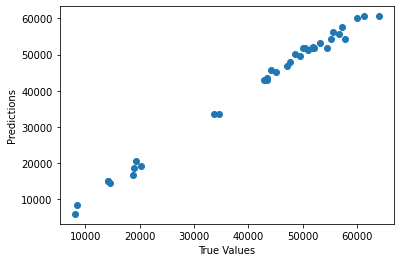

In [ ]:
# The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print("Accuracy score:", model.score(X_test, y_test))

Accuracy score: 0.9942395573232183


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# accuracy, mean absolute error, root mean square error
print(r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions)))

0.9942395573232183 871.0682252416723 1261.5440945992584


#Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[RandomForestRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE']).style.set_caption("Before Tuning")


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


[06:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


,Model,Score,MAE,RMSE
0,RandomForestRegressor,0.989000,1239.730000,1707.030000
1,LGBMRegressor,0.977000,1730.050000,2522.490000
2,XGBRFRegressor,0.972000,2168.750000,2790.310000


#Hyperparameter Tuning

##XGBRFRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params_xg=grid_result.regressor_.best_params_
print(best_params_xg)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[06:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 7, 'n_estimators': 80, 'reg_lambda': 0.26}


In [ ]:
#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params_xg["max_depth"], n_estimators=best_params_xg["n_estimators"], reg_lambda=best_params_xg["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
score=[]
score.append(["XGboost",r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))])

[06:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [ ]:
score

[['XGboost', 0.9894789137875644, 1431.3281792534722, 1704.9230998047292]]

##LGBMRegressor

In [ ]:
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(lgbm.LGBMRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params_lgbm=grid_result.regressor_.best_params_
print(best_params_lgbm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


{'max_depth': 7, 'n_estimators': 80, 'reg_lambda': 0.25}


In [ ]:
#using best params to create and fit model
best_model = lgbm.LGBMRegressor(max_depth=best_params_lgbm["max_depth"], n_estimators=best_params_lgbm["n_estimators"], reg_lambda=best_params_lgbm["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
score.append(["LGBMRegressor",r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


##RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
best_random = rf_random.best_estimator_
yhat = best_random.predict(X_test)
score.append(["RandomForestRegressor",r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))])

In [ ]:
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE']).style.set_caption("After Tuning")

,Model,Score,MAE,RMSE
0,XGboost,0.989479,1431.328179,1704.923100
1,LGBMRegressor,0.974643,1930.775907,2646.801517
2,RandomForestRegressor,0.992716,983.101852,1418.553346
